In [104]:
import pandas as pd 

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [105]:
print(train_df.describe().transpose())

              count unique                                                top  \
User_ID       38932  38932                                            id28787   
Description   38932  38932  Our room was very comfortable and very clean. ...   
Browser_Used  38932     11                                            Firefox   
Device_Used   38932      3                                            Desktop   
Is_Response   38932      2                                              happy   

               freq  
User_ID           1  
Description       1  
Browser_Used   7367  
Device_Used   15026  
Is_Response   26521  


In [106]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = train_df.isnull().sum().sort_values(ascending=False)
percentage = ((train_df.isnull().sum()/len(train_df)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


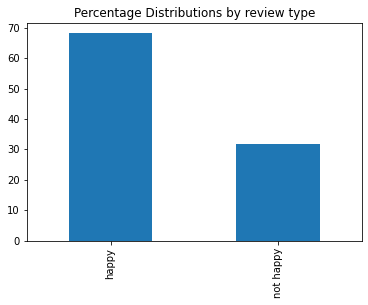

In [107]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt

print('Percentage for default\n')
print(round(train_df.Is_Response.value_counts(normalize=True)*100,2))
round(train_df.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

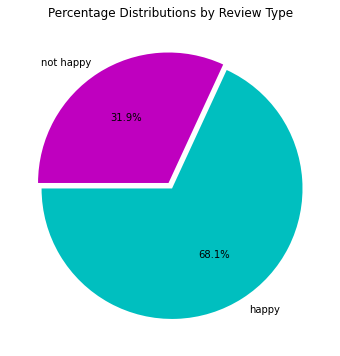

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.title("Percentage Distributions by Review Type")
g = plt.pie(round(train_df.Is_Response.value_counts(normalize=True)*100,2),explode=(0.025,0.025), labels=round(train_df.Is_Response.value_counts(normalize=True)*100,2).index, colors=["c","m"],autopct="%1.1f%%", startangle=180)
plt.show()

In [109]:
#Removing columns
train_df.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [110]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [111]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

In [112]:
def decontract_text(text):
    """
    Decontract text
    """
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    
    return text

In [113]:
train_df['cleaned_description'] = train_df['Description'].apply(lambda x: decontract_text(x))
train_df['cleaned_description'] = train_df['cleaned_description'].apply(lambda x: text_clean_1(x))
train_df['cleaned_description'] = train_df['cleaned_description'].apply(lambda x: text_clean_2(x))

In [114]:
train_df['cleaned_description'].head(10)

0    the room was kind of clean but had a very stro...
1    i stayed at the crown plaza april   april   th...
2    i booked this hotel through hotwire at the low...
3    stayed here with husband and sons on the way t...
4    my girlfriends and i stayed here to celebrate ...
5    we had  rooms one was very nice and clearly ha...
6    my husband and i have stayed in this hotel a f...
7    my wife  i stayed in this glorious city a whil...
8    my boyfriend and i stayed at the fairmont on a...
9    wonderful staff great location but it was defi...
Name: cleaned_description, dtype: object

In [115]:
print('Original:\n', train_df['Description'][:3])
print('\n\nCleaned:\n', train_df['cleaned_description'][:3])

Original:
 0    The room was kind of clean but had a VERY stro...
1    I stayed at the Crown Plaza April -- - April -...
2    I booked this hotel through Hotwire at the low...
Name: Description, dtype: object


Cleaned:
 0    the room was kind of clean but had a very stro...
1    i stayed at the crown plaza april   april   th...
2    i booked this hotel through hotwire at the low...
Name: cleaned_description, dtype: object


In [117]:
from sklearn.model_selection import train_test_split

x, y = train_df['cleaned_description'], train_df['Is_Response']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    random_state=42)

print(f'x_train: {len(x_train)}')
print(f'x_test: {len(x_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

x_train: 35038
x_test: 3894
y_train: 35038
y_test: 3894


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(iv_train, dv_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(iv_test)
confusion_matrix(predictions, dv_test)

array([[2426,  310],
       [ 145, 1013]])

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.9096045197740112
Precision: 0.9130447094377214
Recall: 0.9096045197740112
